<a href="https://colab.research.google.com/github/jinsu868/linear_aglebra2/blob/main/ex02_transform_tiefighter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 선언

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [168]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [169]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [170]:
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)

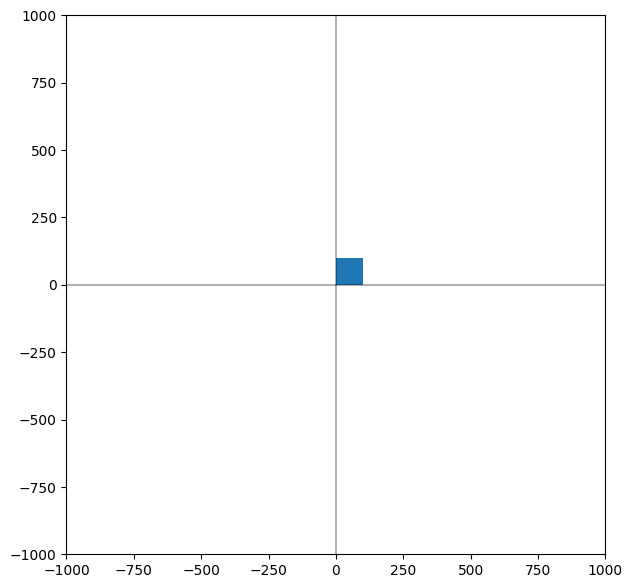

In [171]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

In [172]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [173]:
#scale
def scale(p, sx, sy):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1]])
  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])
  
  return q

In [174]:
#rotate
def rotate(p, r):
  hp = np.array([p[0], p[1], 1])
  m = np.array([[np.cos(r), -np.sin(r), 0.0], [np.sin(r), np.cos(r), 0.0], [0.0, 0.0, 1]])
  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])

  return q

In [175]:
#shearing x
def shear_x(p, sx):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1.0, sx, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])

  return q

In [176]:
#shearing y
def shear_y(p, sy):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1.0, 0.0, 0.0], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])

  return q

In [177]:
#reflect_x
def reflect_x(p):
  hp = np.array([p[0], p[1], 1])
  m = np.array([[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1]])
  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])

  return q

In [178]:
#reflect_y
def reflect_y(p):
  hp = np.array([p[0], p[1], 1])
  m = np.array([[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])

  return q

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [179]:
def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  
  # 2. 크기 변환: S(5, 5)
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)
  

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [180]:
def draw_left_arm(ax, p1, p2, p3, p4):
  # 원점이동
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # shearing
  q1 = shear_x(q1, 2.5)
  q2 = shear_x(q2, 2.5)
  q3 = shear_x(q3, 2.5)
  q4 = shear_x(q4, 2.5)
  
  # 크기 변환
  s = 2
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)

  # arm 위치 변환을 위한 x, y 좌표
  x, y = q1[0], q1[1]

  # 50만큼 위치 보정
  q1 = translate(q1, -x-50, y)
  q2 = translate(q2, -x-50, y)
  q3 = translate(q3, -x-50, y)
  q4 = translate(q4, -x-50, y)

  draw_rectangle(ax, q1, q2, q3, q4)

  # x축 대칭하고 그리기
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)


In [181]:
def draw_right_arm(ax, p1, p2, p3, p4):
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  q1 = shear_x(q1, 2.5)
  q2 = shear_x(q2, 2.5)
  q3 = shear_x(q3, 2.5)
  q4 = shear_x(q4, 2.5)
  
  s = 2
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)

  x, y = q1[0], q1[1]

  q1 = translate(q1, -x-50, y)
  q2 = translate(q2, -x-50, y)
  q3 = translate(q3, -x-50, y)
  q4 = translate(q4, -x-50, y)

  # 여기까지 draw_left_arm

  # draw_left_arm에서 구한 좌표를 y축 대칭을 해주고 plt
  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

  # x축 대칭을 통해 위아래 팔을 다 그려줌
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [182]:
def draw_left_wing(ax, p1, p2, p3, p4):
  # 원점 이동
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 크기 변환 : y방향으로 쭉 늘려줌
  s = 7
  q1 = scale(q1, 1, s)
  q2 = scale(q2, 1, s)
  q3 = scale(q3, 1, s)
  q4 = scale(q4, 1, s)

  # shearing
  q1 = shear_y(q1, -2)
  q2 = shear_y(q2, -2)
  q3 = shear_y(q3, -2)
  q4 = shear_y(q4, -2)

  # wing을 요구되는 위치로 이동
  q1 = translate(q1, 625, -100)
  q2 = translate(q2, 625, -100)
  q3 = translate(q3, 625, -100)
  q4 = translate(q4, 625, -100)

  draw_rectangle(ax, q1, q2, q3, q4)

  # 위아래 꺽인 방향이 대칭됨으로 x축 대칭해서 다시 그려줌
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)


In [183]:
def draw_right_wing(ax, p1, p2, p3, p4):
  # 원점이동
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 크기 변환 : y축으로 늘려줌
  s = 7
  q1 = scale(q1, 1, s)
  q2 = scale(q2, 1, s)
  q3 = scale(q3, 1, s)
  q4 = scale(q4, 1, s)

  # shearing
  q1 = shear_y(q1, 2)
  q2 = shear_y(q2, 2)
  q3 = shear_y(q3, 2)
  q4 = shear_y(q4, 2)

  # 요구되는 위치로 이동
  q1 = translate(q1, -625, -100)
  q2 = translate(q2, -625, -100)
  q3 = translate(q3, -625, -100)
  q4 = translate(q4, -625, -100)

  draw_rectangle(ax, q1, q2, q3, q4)

  #위아래 날개모양이 대칭임으로 x축 대칭하고 plt
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [184]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)
  # 2. 왼쪽 날개축 그리기
  draw_left_arm(ax, p1, p2, p3, p4)
  # 3. 왼쪽 날개 그리기
  draw_left_wing(ax, p1, p2, p3, p4)
  # 4. 오른쪽 날개축 그리기
  draw_right_arm(ax, p1, p2, p3, p4)
  # 5. 오른쪽 날개 그리기
  draw_right_wing(ax, p1, p2, p3, p4)
  

  

### 3. main

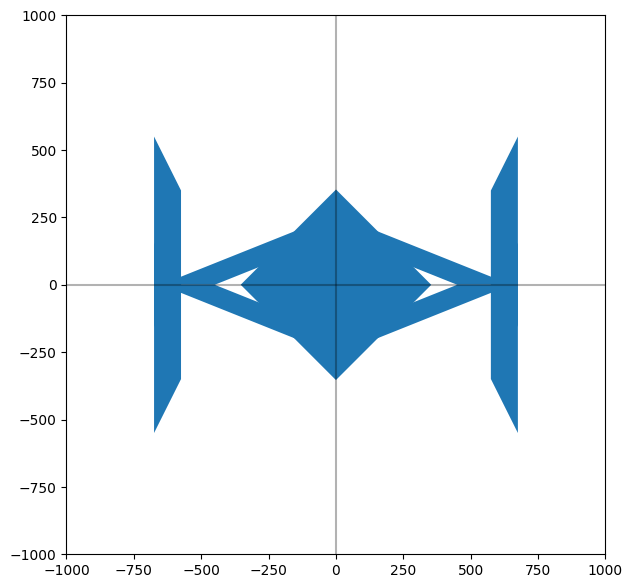

In [185]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()